# Modelo de regresión lineal 1

In [2]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from regressors import stats

# Estilos
sns.set(style='whitegrid')

# Preprocesamiento y entrenamiento
* Todas las variables

In [3]:
df = pd.read_csv('../datos/procesados/edad_cangrejos.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893 entries, 0 to 3892
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             3893 non-null   object 
 1   Length          3893 non-null   float64
 2   Diameter        3893 non-null   float64
 3   Height          3893 non-null   float64
 4   Weight          3893 non-null   float64
 5   Shucked Weight  3893 non-null   float64
 6   Viscera Weight  3893 non-null   float64
 7   Shell Weight    3893 non-null   float64
 8   Age             3893 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 273.9+ KB


In [6]:
# Seleccionamos las columnas
columnas_numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
columnas_numericas = [col for col in columnas_numericas if col != 'Age']
columnas_categoricas = df.select_dtypes(include=['object']).columns.tolist()

In [8]:
# Instanciar el OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Aplicar OneHotEncodong y StandarScaler
preprocesador = ColumnTransformer(
    transformers=[
        ('cat', encoder, columnas_categoricas),
        ('num', StandardScaler(), columnas_numericas)
    ],
    remainder = 'passthrough'
)

In [10]:
# Transformar los datos
X = preprocesador.fit_transform(df.drop(columns=['Age']))
y = df.Age

In [11]:
# Se dividen los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
# Instanciar modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

In [14]:
# R² (Coeficiente de Determinación) Entre cero y uno, por encima de 0.7 puede llegar a ser un buen aceptable
r2 = round(r2_score(y_test, y_pred),3)

# Error Cuadrático Medio - Está en unidades cuadradas de la variable objetivo
mse = round(mean_squared_error(y_test, y_pred),3)

# Raiz del MSE (RMSE) - Está en las mismas unidades de la variable objetivo, entre más bajo mejor
rmse = round((mse ** 0.5), 3)

# Error relativo promedio - Menor al 10% Excelente, entre 11% y 20% Bueno, por encima de 30% necesita ajustes
error_relativo = round((rmse / df['Age'].mean() *100),3)

# Error absoluto medio (MAE) - Debe ser bajo en relación al rango de la variable objetivo
mae = round(mean_absolute_error(y_pred, y_test), 3)

In [15]:
print('r2:', r2) # Por encima del 75 es un buen modelo, por encima de 85 es un excelente modelo, por encima de 90 es un modelo perfecto
print('mse:', mse) # Evalua el modelo entre 3 y -3
print(f"rmse: {rmse} unidades de la variablre objetivo")
print(f'Error relativo promedio: {error_relativo}')
print(f'mae: {mae}')

r2: 0.535
mse: 4.635
rmse: 2.153 unidades de la variablre objetivo
Error relativo promedio: 21.628
mae: 1.518


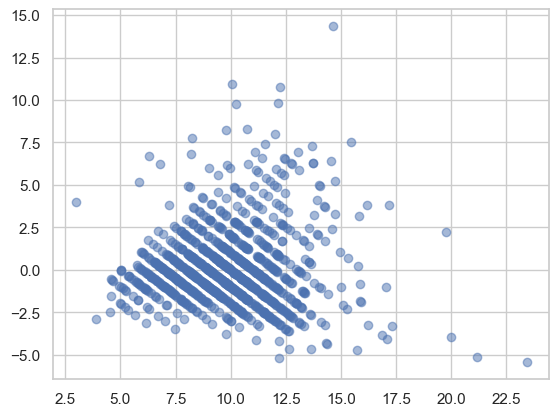

In [16]:
# Gráfico de residuales
residuales = np.subtract(y_test, y_pred.reshape(-1)) # reshape para que quede con las mismas dimensiones
plt.scatter(y_pred, residuales, alpha=0.5)
plt.show()